In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = 'dataset'
DATASET_TRAIN = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TRAIN.csv')
DATASET_TEST = os.path.join(DATA_FOLDER, 'RavdessAudioOnlyFeatures_TEST.csv')
PREPROCESSED_TRAIN = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TRAIN.csv')
PREPROCESSED_TEST = os.path.join(DATA_FOLDER, 'preprocessed_dataset_TEST.csv')

In [3]:
df_train = pd.read_csv(DATASET_TRAIN)
df_train.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782


In [4]:
df_test = pd.read_csv(DATASET_TEST)
df_test.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354


In [5]:
df_train.shape

(1828, 434)

In [6]:
df_test.shape

(624, 434)

In [7]:
single_value_columns_train = [column for column in df_train.columns if len(df_train[column].unique()) == 1]
len(single_value_columns_train)

52

In [8]:
missing_values_columns_train = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_train)

0

In [9]:
single_value_columns_test = [column for column in df_train.columns if len(df_test[column].unique()) == 1]
len(single_value_columns_test)

50

In [10]:
difference = [column for column in single_value_columns_train if column not in single_value_columns_test]
difference

['zc_q75_w1', 'zc_q75_w2']

In [11]:
missing_values_columns_test = [column for column in df_train.columns if df_train[column].isna().any()]
len(missing_values_columns_test)

0

In [12]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(2452, 434)

In [13]:
single_value_columns = [column for column in df_train.columns if len(df[column].unique()) == 1]
single_value_columns

['modality',
 'lag1_q50',
 'zc_min',
 'zc_max',
 'zc_q01',
 'zc_q05',
 'zc_q25',
 'zc_q50',
 'zc_q75',
 'zc_q99',
 'stft_max',
 'stft_q95',
 'stft_q99',
 'lag1_q50_w1',
 'zc_min_w1',
 'zc_max_w1',
 'zc_q01_w1',
 'zc_q05_w1',
 'zc_q25_w1',
 'zc_q50_w1',
 'zc_min_w2',
 'zc_max_w2',
 'zc_q01_w2',
 'zc_q05_w2',
 'zc_q25_w2',
 'zc_q50_w2',
 'zc_q99_w2',
 'stft_max_w2',
 'stft_q95_w2',
 'stft_q99_w2',
 'zc_min_w3',
 'zc_max_w3',
 'zc_q01_w3',
 'zc_q05_w3',
 'zc_q25_w3',
 'zc_q50_w3',
 'zc_q75_w3',
 'zc_q99_w3',
 'stft_max_w3',
 'stft_q95_w3',
 'stft_q99_w3',
 'lag1_q50_w4',
 'zc_min_w4',
 'zc_max_w4',
 'zc_q01_w4',
 'zc_q05_w4',
 'zc_q25_w4',
 'zc_q50_w4',
 'stft_max_w4',
 'stft_q99_w4']

In [14]:
to_drop = ['filename'] + single_value_columns
df = df.drop(to_drop, axis=1)
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


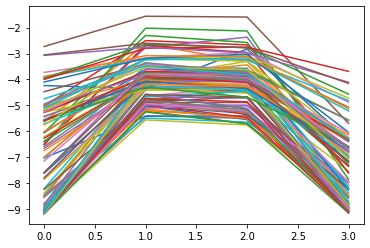

In [15]:
for i in range(100):
    l = []
    for j in [1,2,3,4]:
        l.append(np.log(df_train[f'std_w{j}'][i] + 1e-4))
    plt.plot(l)

In [16]:
df_train['std_w1'].sort_values(ascending=True)[0:20]

1367    0.000000e+00
314     0.000000e+00
315     0.000000e+00
1597    0.000000e+00
324     0.000000e+00
148     3.251552e-07
223     3.937506e-07
1352    3.956688e-07
1583    4.465031e-07
1612    5.131159e-07
1606    5.982042e-07
1363    1.024584e-06
110     1.101518e-06
130     1.253644e-06
213     1.344055e-06
1358    1.375753e-06
1405    1.414177e-06
1361    1.576392e-06
843     1.690376e-06
1599    1.693941e-06
Name: std_w1, dtype: float64

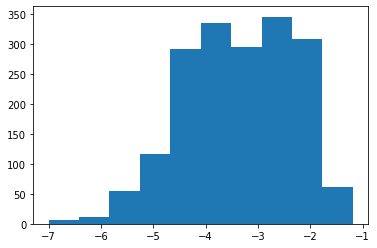

In [17]:
df_train['dummy'] = df_train['std_w1'].copy()
df_train[df_train['dummy'] == 0] = 1e-7
df_train['dummy']  = df_train['dummy'].apply(np.log10)
plt.hist(df_train['dummy'])
plt.show()

In [18]:
from pandas.core.dtypes.common import is_numeric_dtype
from scipy.stats import shapiro

numeric_attr_list = [column for column in df.columns if is_numeric_dtype(df[column])]

gaussian = []
not_gaussian = []

for i in numeric_attr_list:
    if shapiro(df[i]).pvalue >= 1e-34:
        gaussian.append([i, shapiro(df[i]).pvalue])
    else:
        not_gaussian.append([i, shapiro(df[i]).pvalue])

In [19]:
gaussian

[['actor', 4.631492700666952e-28],
 ['frame_count', 2.5612104781991634e-24],
 ['skew', 4.3752758442086245e-15],
 ['zc_sum', 4.670527603532115e-22],
 ['zc_mean', 1.8366727863188936e-22],
 ['zc_std', 2.2849922061141115e-06],
 ['zc_kur', 7.480714863463486e-31],
 ['zc_skew', 6.203927121343816e-16],
 ['mfcc_sum', 5.786975315290219e-29],
 ['mfcc_mean', 0.007722990121692419],
 ['mfcc_std', 1.5601797713316046e-05],
 ['mfcc_min', 0.026575790718197823],
 ['mfcc_max', 1.8265471080081142e-10],
 ['mfcc_q01', 3.2799191103549674e-05],
 ['mfcc_q05', 5.933138332160205e-21],
 ['mfcc_q25', 7.837990239484283e-14],
 ['mfcc_q50', 5.352670464476904e-34],
 ['mfcc_q75', 1.0182725553716575e-34],
 ['mfcc_q95', 7.090617870630922e-09],
 ['mfcc_q99', 2.997522834904095e-18],
 ['mfcc_kur', 7.760302636350068e-28],
 ['mfcc_skew', 7.867091136354212e-16],
 ['sc_sum', 0.09583481401205063],
 ['sc_mean', 1.0786129678308498e-05],
 ['sc_std', 4.732001837650862e-17],
 ['sc_q25', 9.245979834861275e-19],
 ['sc_q50', 1.6287334693

In [20]:
not_gaussian

[['sum', 0.0],
 ['mean', 0.0],
 ['std', 0.0],
 ['min', 0.0],
 ['max', 0.0],
 ['q01', 0.0],
 ['q05', 0.0],
 ['q25', 0.0],
 ['q50', 0.0],
 ['q75', 0.0],
 ['q95', 0.0],
 ['q99', 0.0],
 ['kur', 2.8166099132928823e-43],
 ['lag1_sum', 0.0],
 ['lag1_mean', 0.0],
 ['lag1_std', 0.0],
 ['lag1_min', 0.0],
 ['lag1_max', 0.0],
 ['lag1_q01', 0.0],
 ['lag1_q05', 0.0],
 ['lag1_q25', 0.0],
 ['lag1_q75', 0.0],
 ['lag1_q95', 0.0],
 ['lag1_q99', 0.0],
 ['lag1_kur', 0.0],
 ['lag1_skew', 9.698606395191265e-38],
 ['zc_q95', 0.0],
 ['sc_min', 2.802596928649634e-45],
 ['sc_max', 2.1860256043467146e-43],
 ['sc_q01', 1.8497139729087585e-43],
 ['sc_q05', 3.4456527939282927e-41],
 ['sc_q99', 3.7900919564593327e-41],
 ['sc_kur', 0.0],
 ['stft_min', 0.0],
 ['stft_q01', 0.0],
 ['stft_q05', 0.0],
 ['stft_kur', 1.8284422622203078e-40],
 ['sum_w1', 0.0],
 ['mean_w1', 0.0],
 ['std_w1', 0.0],
 ['min_w1', 0.0],
 ['max_w1', 0.0],
 ['q01_w1', 0.0],
 ['q05_w1', 0.0],
 ['q25_w1', 0.0],
 ['q50_w1', 0.0],
 ['q75_w1', 0.0],
 ['q9

In [21]:
zero_list = [pair[0] for pair in not_gaussian if pair[1] == 0]
zero_list

['sum',
 'mean',
 'std',
 'min',
 'max',
 'q01',
 'q05',
 'q25',
 'q50',
 'q75',
 'q95',
 'q99',
 'lag1_sum',
 'lag1_mean',
 'lag1_std',
 'lag1_min',
 'lag1_max',
 'lag1_q01',
 'lag1_q05',
 'lag1_q25',
 'lag1_q75',
 'lag1_q95',
 'lag1_q99',
 'lag1_kur',
 'zc_q95',
 'sc_kur',
 'stft_min',
 'stft_q01',
 'stft_q05',
 'sum_w1',
 'mean_w1',
 'std_w1',
 'min_w1',
 'max_w1',
 'q01_w1',
 'q05_w1',
 'q25_w1',
 'q50_w1',
 'q75_w1',
 'q95_w1',
 'q99_w1',
 'kur_w1',
 'skew_w1',
 'lag1_sum_w1',
 'lag1_mean_w1',
 'lag1_std_w1',
 'lag1_min_w1',
 'lag1_max_w1',
 'lag1_q01_w1',
 'lag1_q05_w1',
 'lag1_q25_w1',
 'lag1_q75_w1',
 'lag1_q95_w1',
 'lag1_q99_w1',
 'lag1_kur_w1',
 'lag1_skew_w1',
 'zc_q75_w1',
 'zc_q95_w1',
 'zc_q99_w1',
 'zc_kur_w1',
 'zc_skew_w1',
 'sc_max_w1',
 'sc_q95_w1',
 'sc_q99_w1',
 'sc_kur_w1',
 'stft_min_w1',
 'stft_max_w1',
 'stft_q01_w1',
 'stft_q75_w1',
 'stft_q95_w1',
 'stft_q99_w1',
 'stft_kur_w1',
 'sum_w2',
 'mean_w2',
 'std_w2',
 'min_w2',
 'max_w2',
 'q01_w2',
 'q05_w2',
 '

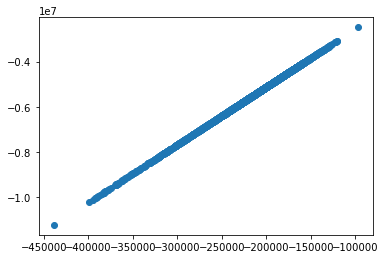

In [22]:
# vale per ogni colonna (zc, stft, mfcc, ecc)
plt.scatter(df['mfcc_sum'], df["frame_count"]*df['mfcc_mean'])
plt.show()

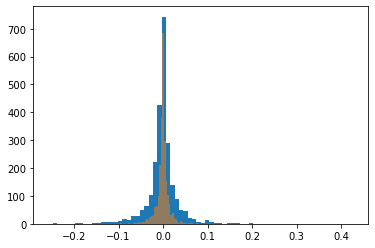

In [23]:
plt.hist(df['lag1_sum_w3'], bins=70)
lag1_sum_w3_logmodtransf = np.sign(df["lag1_sum_w3"])*np.log10(np.abs(df["lag1_sum_w3"]) + 1)
plt.hist(lag1_sum_w3_logmodtransf, alpha=0.5, bins=70)
#plt.xscale('log')
plt.show()

In [24]:
len(df[df['stft_min'] == 0])

1021

## Mutual information

In [25]:
categoric_attr_list = [column for column in df.columns if not is_numeric_dtype(df[column])]
categoric_attr_list.append('actor')
categoric_attr_list

['vocal_channel',
 'emotion',
 'emotional_intensity',
 'statement',
 'repetition',
 'sex',
 'actor']

In [26]:
numeric_attr_list.remove('actor')
df_binned = pd.DataFrame(columns=numeric_attr_list)
for column in numeric_attr_list:

    try:
        df_binned[column] = pd.qcut(df[column], q=10)
    except ValueError:
        print(column, file=sys.stderr)

q50
lag1_sum
lag1_mean
lag1_q25
lag1_q75
zc_q95
mfcc_q50
mfcc_q75
sc_min
sc_q01
sc_q05
stft_min
stft_q01
stft_q05
q05_w1
q25_w1
q50_w1
q75_w1
q95_w1
lag1_sum_w1
lag1_mean_w1
lag1_q01_w1
lag1_q05_w1
lag1_q25_w1
lag1_q75_w1
lag1_q95_w1
lag1_q99_w1
zc_q75_w1
zc_q95_w1
zc_q99_w1
mfcc_min_w1
mfcc_q01_w1
mfcc_q25_w1
mfcc_q50_w1
mfcc_q75_w1
sc_min_w1
sc_q01_w1
sc_q05_w1
sc_q25_w1
sc_q50_w1
stft_min_w1
stft_max_w1
stft_q01_w1
stft_q05_w1
stft_q25_w1
stft_q50_w1
stft_q95_w1
stft_q99_w1
q50_w2
lag1_q50_w2
zc_q75_w2
zc_q95_w2
q50_w3
lag1_q50_w3
zc_q95_w3
q25_w4
q50_w4
q75_w4
lag1_q01_w4
lag1_q05_w4
lag1_q25_w4
lag1_q75_w4
lag1_q95_w4
lag1_q99_w4
zc_q75_w4
zc_q95_w4
zc_q99_w4
stft_q95_w4


In [27]:
df_binned.dropna(axis=1, how='all', inplace=True)

In [28]:
from sklearn.metrics import adjusted_mutual_info_score as ami

df_ami = pd.DataFrame(columns=['num', 'cat', 'ami'])
for column_i in df_binned.columns:
    for column_j in categoric_attr_list:
        row = dict(num=column_i, cat=column_j, ami=ami(df_binned[column_i], df[column_j]))
        row = pd.DataFrame(row, index=[0])
        df_ami = pd.concat([df_ami, row])

In [29]:
df_ami.sort_values('ami', ascending=False)

,num,cat,ami
0,length_w1,vocal_channel,0.295431
0,length_w4,vocal_channel,0.295426
0,length_w2,vocal_channel,0.295426
0,frame_count,vocal_channel,0.294869
0,length_w3,vocal_channel,0.294867
...,...,...,...
0,q05_w4,repetition,-0.001016
0,mfcc_q25_w4,repetition,-0.001038
0,mfcc_q50_w4,repetition,-0.001041
0,q75_w3,statement,-0.001085


## Correlated features having same prefix

In [30]:
prefixes = [
    'sum',
    'mean',
    'std',
    'min',
    'max',
    'kur',
    'skew',
    'lag1',
    'zc',
    'mfcc',
    'sc',
    'stft',
    'length',
    'q'
]

In [31]:
from collections import defaultdict

corr_dict = defaultdict(set)

for prefix in prefixes:
    for column_i in numeric_attr_list:
        for column_j in numeric_attr_list:
            if column_i != column_j and column_i.startswith(prefix) and column_j.startswith(prefix) \
                and df[column_i].corr(df[column_j], method='spearman') > 0.95:
                    corr_dict[prefix].add(column_i)
                    corr_dict[prefix].add(column_j)

In [32]:
def compute_corr(correlation_dict):
    new_dict = dict()
    for key in correlation_dict.keys():
        columns = list(correlation_dict[key])
        new_dict[key] = dict(df[columns].corr(method='spearman'))

    return new_dict

In [33]:
from contextlib import redirect_stdout

def redirect_to_file(filename, str_to_redirect):
    path = os.path.join(DATA_FOLDER, filename)
    with open(path, 'w') as f:
        with redirect_stdout(f):
            print(str_to_redirect)

In [34]:
corr_dict = compute_corr(corr_dict)
res = ''

for prefix in corr_dict.keys():
    for column in corr_dict[prefix].keys():
        to_be_printed = f'\nCorrelated with {column}:\n'
        series = corr_dict[prefix][column]
        to_be_printed += f'{series[series > 0.95]}'
        print(to_be_printed)

        res += to_be_printed + '\n'

redirect_to_file('correlated_features_same_prefix.txt', res)


Correlated with std_w2:
std_w2    1.000000
std       0.985798
std_w3    0.951336
Name: std_w2, dtype: float64

Correlated with std:
std_w2    0.985798
std       1.000000
std_w3    0.986827
Name: std, dtype: float64

Correlated with std_w3:
std_w2    0.951336
std       0.986827
std_w3    1.000000
Name: std_w3, dtype: float64

Correlated with min:
min       1.000000
min_w3    0.966441
min_w2    0.988279
Name: min, dtype: float64

Correlated with min_w3:
min       0.966441
min_w3    1.000000
Name: min_w3, dtype: float64

Correlated with min_w2:
min       0.988279
min_w2    1.000000
Name: min_w2, dtype: float64

Correlated with max_w2:
max_w2    1.000000
max       0.984976
Name: max_w2, dtype: float64

Correlated with max:
max_w2    0.984976
max       1.000000
max_w3    0.964848
Name: max, dtype: float64

Correlated with max_w3:
max       0.964848
max_w3    1.000000
Name: max_w3, dtype: float64

Correlated with lag1_q99_w3:
lag1_q99_w3    1.000000
lag1_max_w3    0.964148
lag1_q95       0.